In [ ]:
# Performing explorata

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#loading Data
data=pd.read_csv(r"D:\InternData\COVID-19 Coronavirus.csv")

In [7]:
#first 5 observation of dataset
data.head(5)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [9]:
#last 5 observation of dataset
data.tail(5)

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
220,Wallis and Futuna,Wallis and Futuna Islands,WLF,10894,Oceania,454,7,41674,643,1.541850
221,Western Sahara,Western Sahara,ESHÂ,623031,Africa,10,1,16,2,10.000000
222,Yemen,Yemen,YEM,30975258,Asia,11806,2143,381,69,18.151787
223,Zambia,Zambia,ZMB,19284482,Africa,317076,3967,16442,206,1.251120
224,Zimbabwe,Zimbabwe,ZWE,15241601,Africa,246525,5446,16174,357,2.209107


In [11]:
#columns of dataset
data.columns

Index(['Country', 'Other names', 'ISO 3166-1 alpha-3 CODE', 'Population',
       'Continent', 'Total Cases', 'Total Deaths', 'Tot Cases//1M pop',
       'Tot Deaths/1M pop', 'Death percentage'],
      dtype='object')

In [10]:
#summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [14]:
#Statistical summary of numeric columns in our dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,225.0,3.507321e+07,1.392418e+08,805.0,566557.000000,5.827911e+06,2.190585e+07,1.439324e+09
Total Cases,225.0,2.184781e+06,7.275938e+06,1.0,24071.000000,1.639360e+05,1.092547e+06,8.183905e+07
Total Deaths,225.0,2.744813e+04,9.689177e+04,0.0,189.000000,1.965000e+03,1.366000e+04,1.008222e+06
Tot Cases//1M pop,225.0,1.369004e+05,1.450603e+05,9.0,11384.000000,8.898700e+04,2.233350e+05,6.960440e+05
Tot Deaths/1M pop,225.0,1.096716e+03,1.195716e+03,0.0,123.000000,7.080000e+02,1.795000e+03,6.286000e+03
Death percentage,225.0,1.444125e+00,1.741728e+00,0.0,0.511291,1.036905e+00,1.977017e+00,1.815179e+01


In [17]:
#missing values in the dataset
data.isna().sum()

Country                    0
Other names                1
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [28]:
#raw which contains null values
data[data.isna().any(axis=1)]

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
135,Montenegro,NaN,MNE,628205,Europe,233326,2705,371417,4306,1.159322


In [36]:
# replacing null value(replacing null values in the other names with corresponding country name)
data.loc[data.isna().any(axis=1),"Other names"]=data.loc[data.isna().any(axis=1),'Country']

In [37]:
data.isna().sum()

Country                    0
Other names                0
ISO 3166-1 alpha-3 CODE    0
Population                 0
Continent                  0
Total Cases                0
Total Deaths               0
Tot Cases//1M pop          0
Tot Deaths/1M pop          0
Death percentage           0
dtype: int64

In [42]:
# renaming column
data.rename(columns={'ISO 3166-1 alpha-3 CODE':'Code'},inplace=True)
data.head(4)

,Country,Other names,Code,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271


In [56]:
#5 countries which have more number of covid cases
top_5_countries=data.nlargest(n=5,columns="Total Cases")
top_5_countries

,Country,Other names,Code,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
214,USA,United States of America,USA,334400597,Northern America,81839052,1008222,244734,3015,1.231957
92,India,India,IND,1403754381,Asia,43029044,521388,30653,371,1.211712
26,Brazil,Brazil,BRA,215204501,Latin America and the Caribbean,29999816,660269,139401,3068,2.200910
70,France,France,FRA,65526369,Europe,25997852,142506,396754,2175,0.548145
76,Germany,Germany,DEU,84252947,Europe,21646375,130563,256921,1550,0.603163


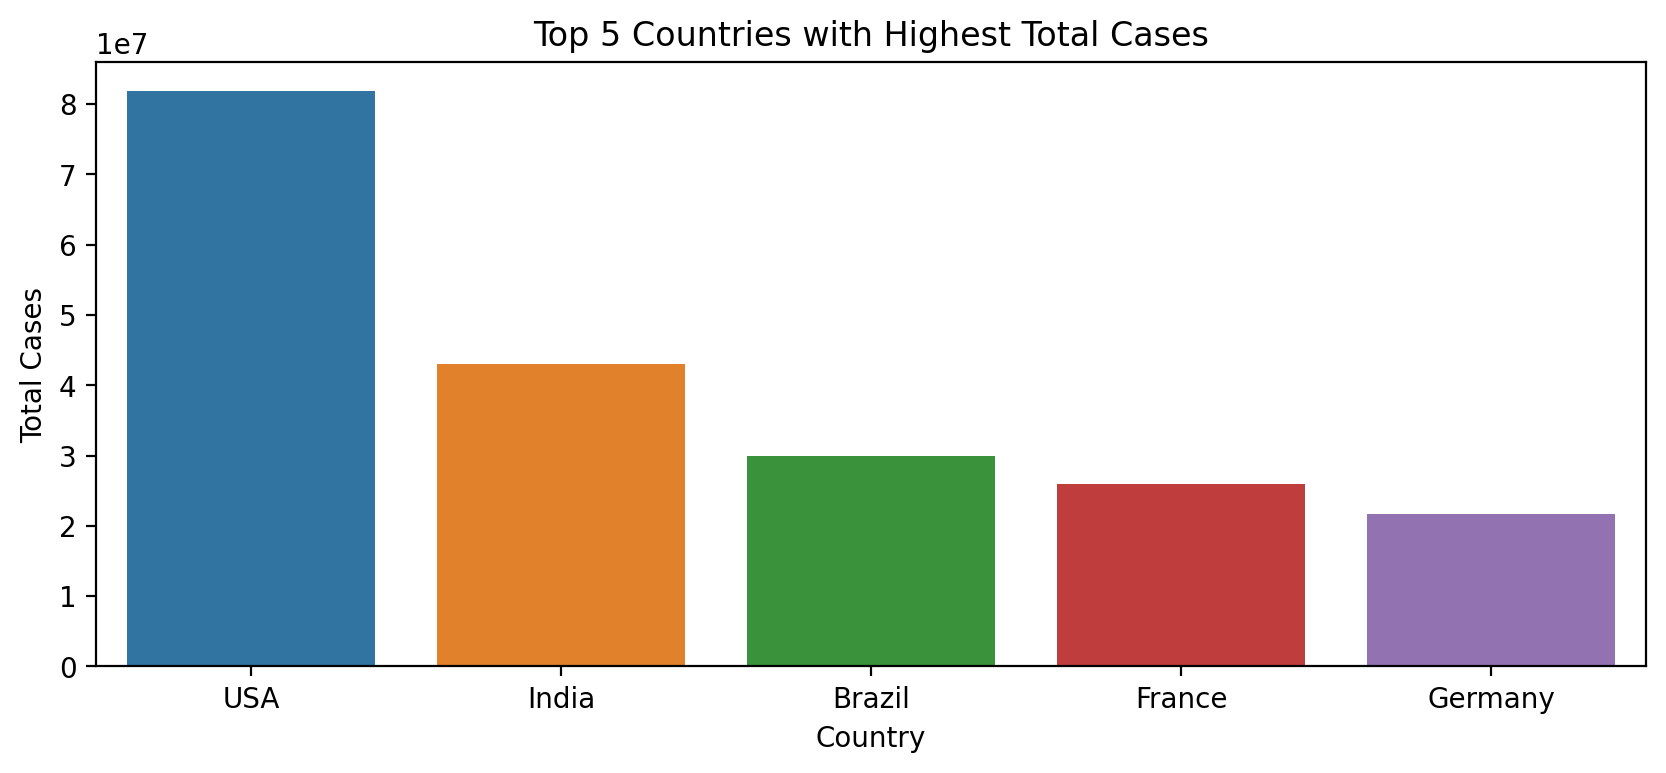

In [55]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(data=top_5_countries,x="Country",y="Total Cases")
plt.title("Top 5 Countries with Highest Total Cases");

This are the countries which have reported highest total number of covid postive cases

In [59]:
#5 countries which have least number of covid cases
least_5_countries=data.nsmallest(n=5,columns="Total Cases")
least_5_countries[['Country','Total Cases']]

,Country,Total Cases
131,Micronesia,1
168,Saint Helena,2
125,Marshall Islands,7
148,Niue,7
221,Western Sahara,10


In [75]:
#using Choropleth map
import plotly.express as px
fig = px.choropleth(data, locations='Country', locationmode='country names',color='Total Cases', hover_name='Country',
                    title='Total Cases by Country',color_continuous_scale='Reds')
fig.show()

<Figure size 2400x1200 with 0 Axes>

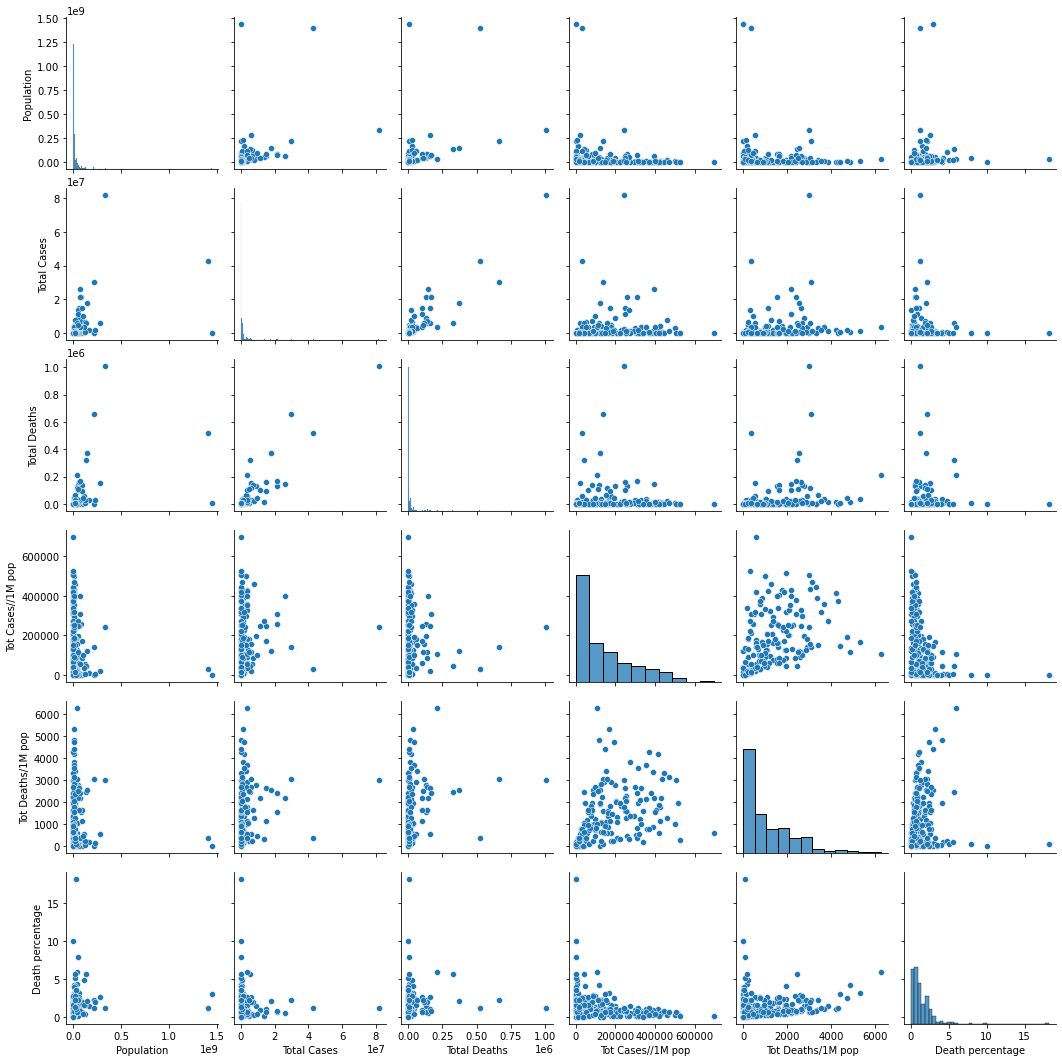

In [83]:
#pairplot
plt.figure(figsize=(12,6),dpi=200)
sns.pairplot(data);

In [84]:
#corelation matrix
data.corr()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
Population,1.000000,0.430687,0.428189,-0.130130,-0.066485,0.083387
Total Cases,0.430687,1.000000,0.915263,0.127890,0.216272,-0.032520
Total Deaths,0.428189,0.915263,1.000000,0.036561,0.289201,0.082616
Tot Cases//1M pop,-0.130130,0.127890,0.036561,1.000000,0.508630,-0.349986
Tot Deaths/1M pop,-0.066485,0.216272,0.289201,0.508630,1.000000,0.061088
Death percentage,0.083387,-0.032520,0.082616,-0.349986,0.061088,1.000000


- Hence we can conclude total population and total cases are  moderately postively corelated.
- Total population and total death are also moderately postively corelated.
- Total cases and total death are highly postively corelated.


In [89]:
data.columns

Index(['Country', 'Other names', 'Code', 'Population', 'Continent',
       'Total Cases', 'Total Deaths', 'Tot Cases//1M pop', 'Tot Deaths/1M pop',
       'Death percentage'],
      dtype='object')

<AxesSubplot:xlabel='Total Cases', ylabel='Total Deaths'>

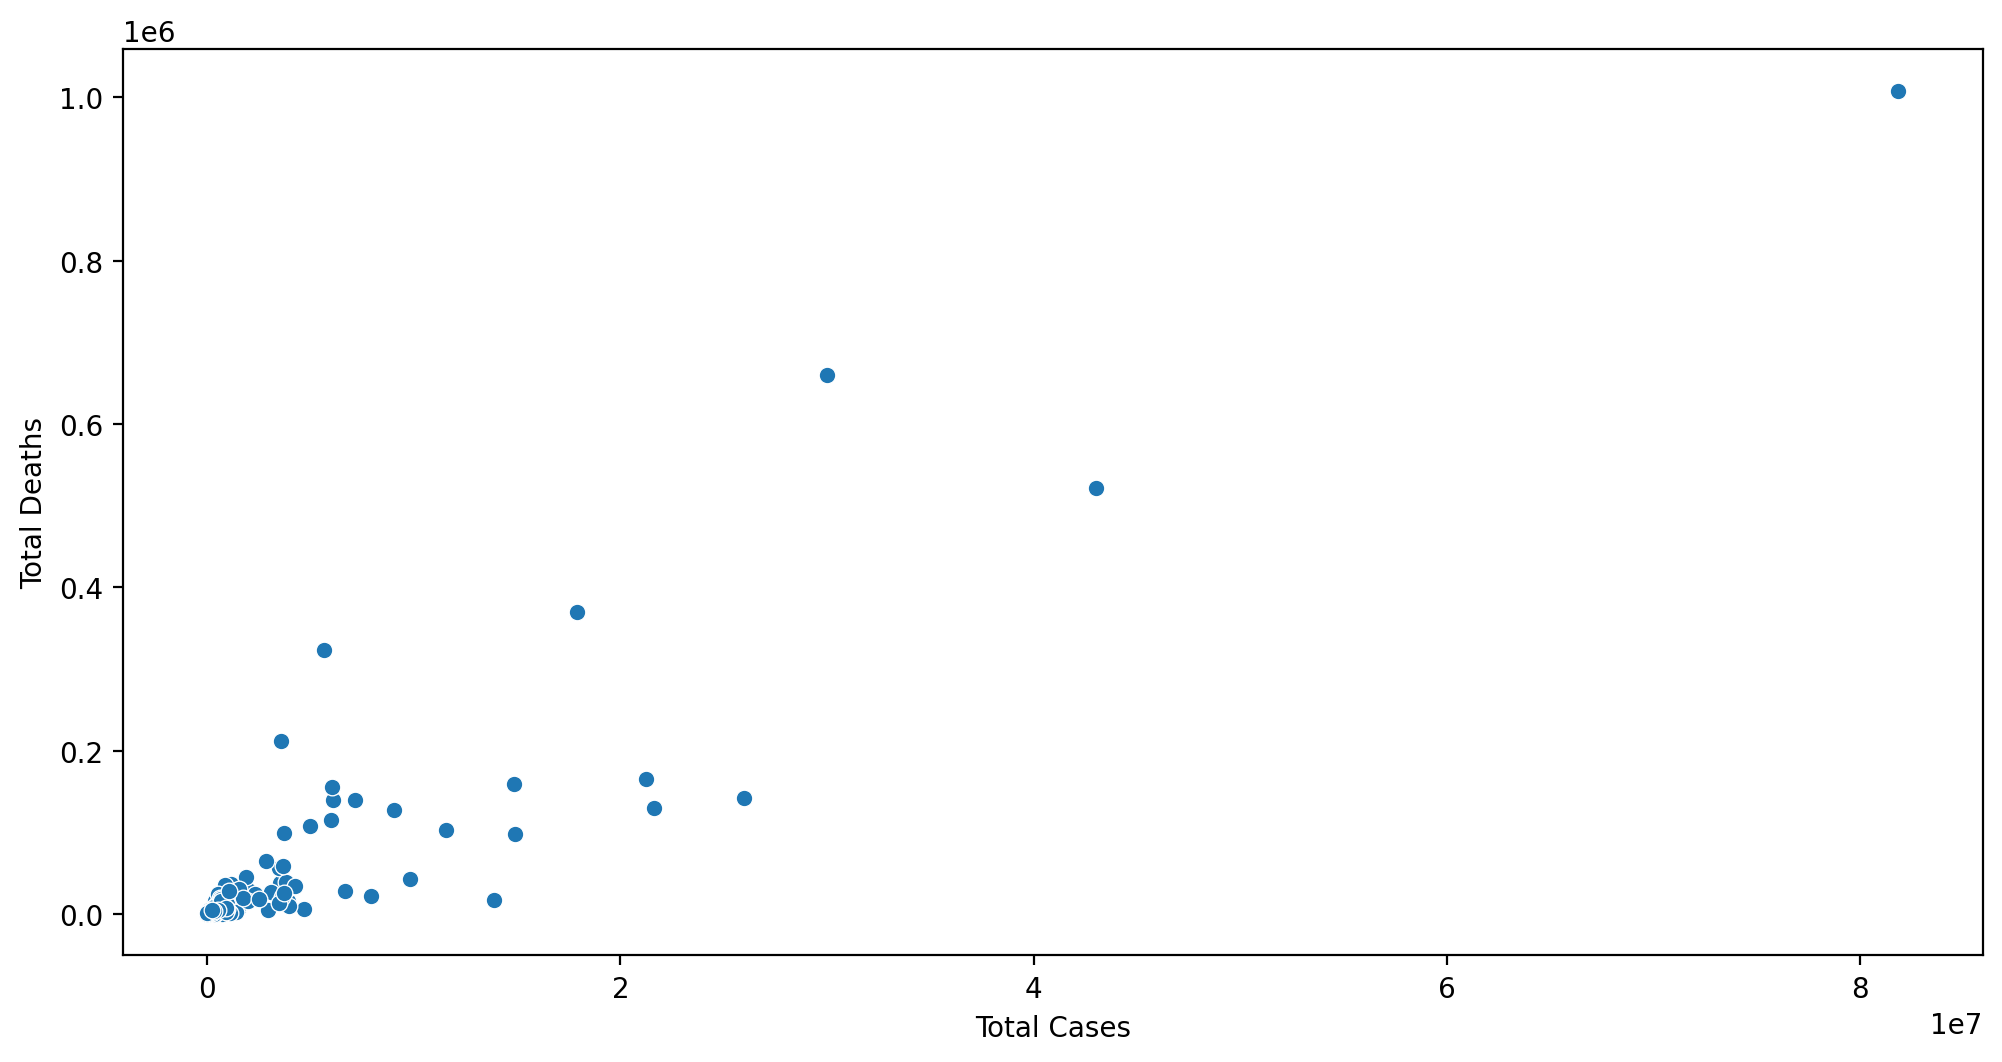

In [92]:
# finding outliers using scatter plots
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(x=data['Total Cases'],y=data['Total Deaths'])

In [ ]:
here the countries which have total death above 

<AxesSubplot:xlabel='Population', ylabel='Total Deaths'>

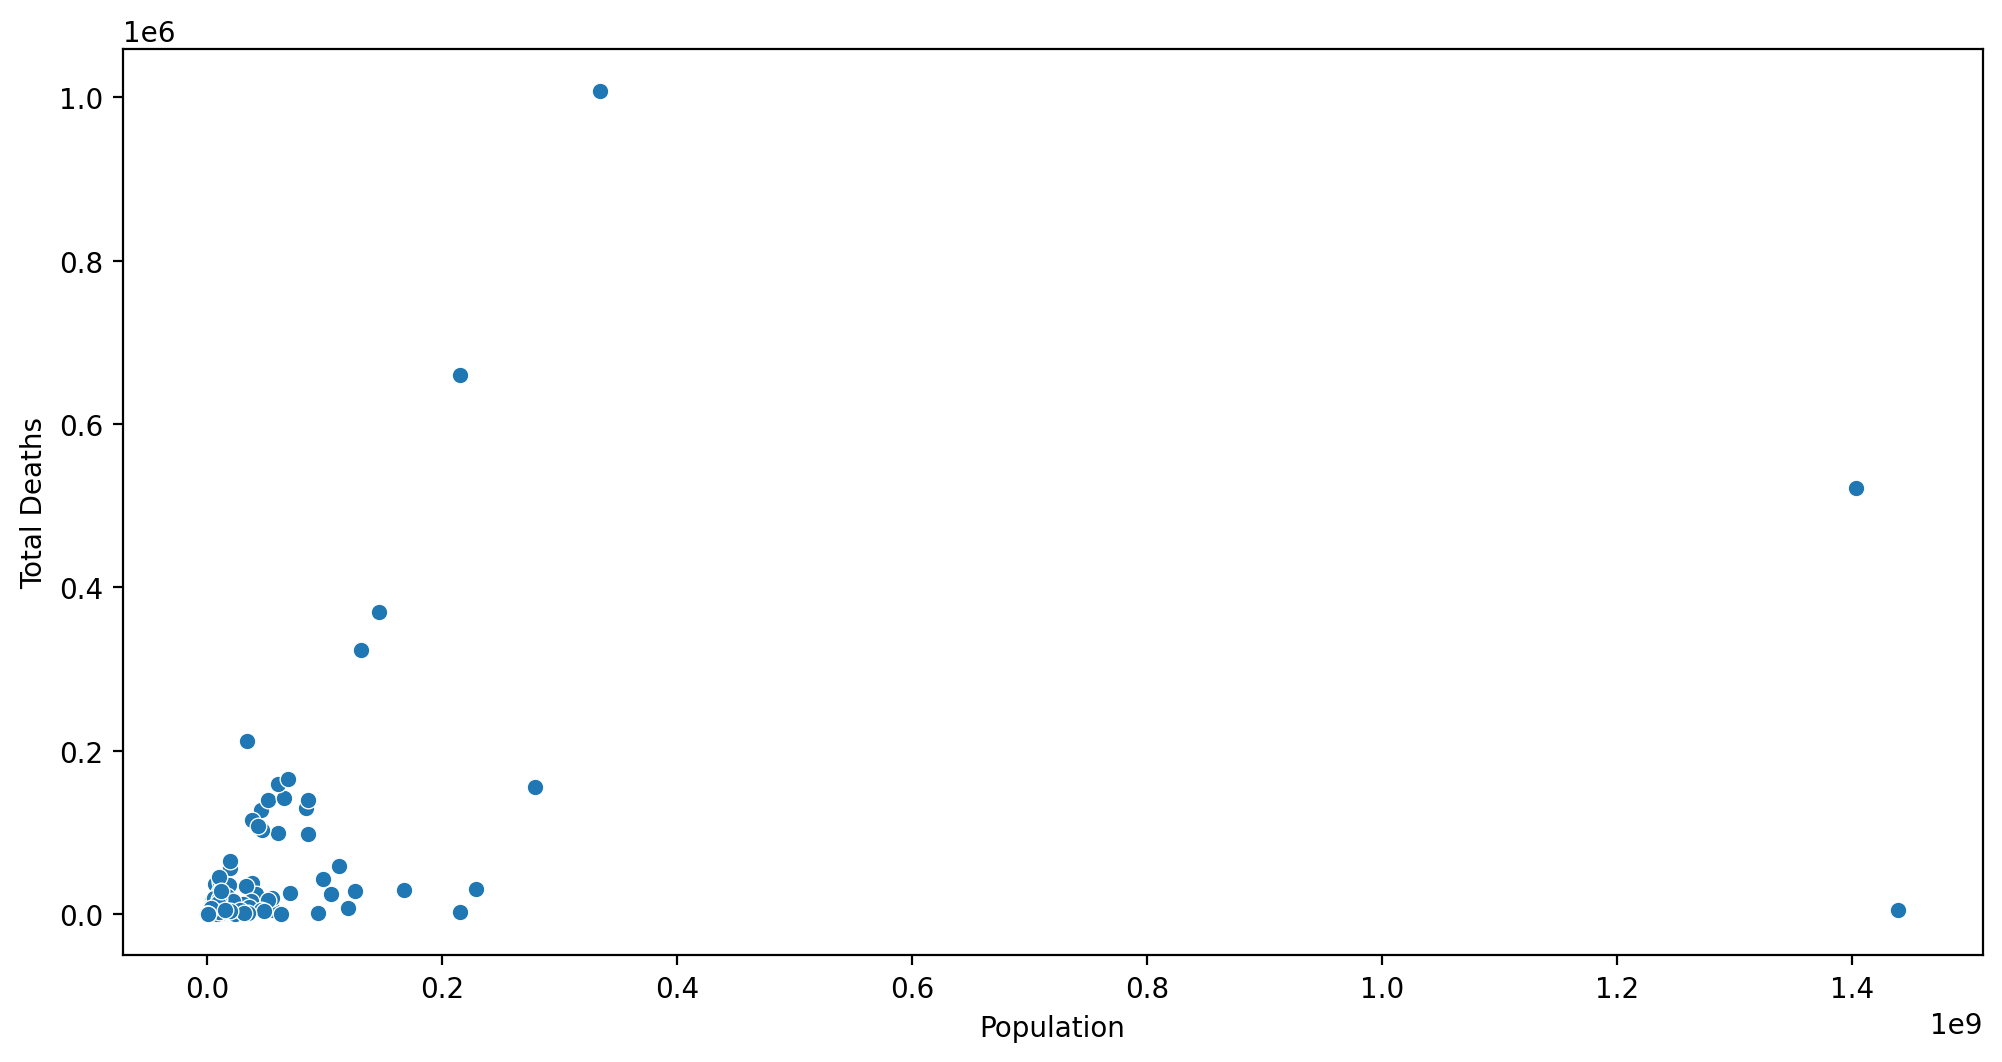

In [99]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(x=data['Population'],y=data['Total Deaths'])

In [112]:
data[(data['Total Deaths']>0.4e6) | (data['Total Cases']>4e7) | (data['Population']>0.4e9)] 

,Country,Other names,Code,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
26,Brazil,Brazil,BRA,215204501,Latin America and the Caribbean,29999816,660269,139401,3068,2.200910
42,China,China,CHN,1439323776,Asia,154738,4638,108,3,2.997325
92,India,India,IND,1403754381,Asia,43029044,521388,30653,371,1.211712
214,USA,United States of America,USA,334400597,Northern America,81839052,1008222,244734,3015,1.231957


These data points, although appearing far away from the mean in the scatterplot, may not necessarily be treated as outliers. While they lie farther from the mean, it does not automatically classify them as outliers

In [118]:
#using IQR to find outliers

def outlier(data,col):
    outliers=[]                     #pd.DataFrame(columns=data.columns)
    for name in col:
        Q1=data[name].quantile(0.25)
        Q3=data[name].quantile(0.75)
        IQR=Q3-Q1
        lowerbound=Q1-(1.5*IQR)
        upperbound=Q3+(1.5*IQR)
        outr=data[(data[name]<lowerbound)| (data[name]>upperbound)]
        outliers.append(outr)
    return outliers

In [125]:
outliers=outlier(data,['Total Deaths','Total Cases'])
df_outliers=pd.concat(outliers)
#outliers got by using IQR method
df_outliers

,Country,Other names,Code,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
7,Argentina,Argentina,ARG,45921761,Latin America and the Caribbean,9041124,128065,196881,2789,1.416472
26,Brazil,Brazil,BRA,215204501,Latin America and the Caribbean,29999816,660269,139401,3068,2.200910
29,Bulgaria,Bulgaria,BGR,6856886,Europe,1140679,36568,166355,5333,3.205810
35,Canada,Canada,CAN,38321435,Northern America,3499226,37690,91312,984,1.077095
41,Chile,Chile,CHL,19403451,Latin America and the Caribbean,3486653,56750,179692,2925,1.627635
...,...,...,...,...,...,...,...,...,...,...
207,Turkey,Turkey,TUR,85927644,Asia,14894731,98157,173340,1142,0.659005
211,UK,United Kingdom of Great Britain and Northern I...,GBR,68510300,Europe,21216874,165570,309689,2417,0.780369
212,Ukraine,Ukraine,UKR,43273831,Europe,4968881,107980,114824,2495,2.173125
214,USA,United States of America,USA,334400597,Northern America,81839052,1008222,244734,3015,1.231957


<AxesSubplot:>

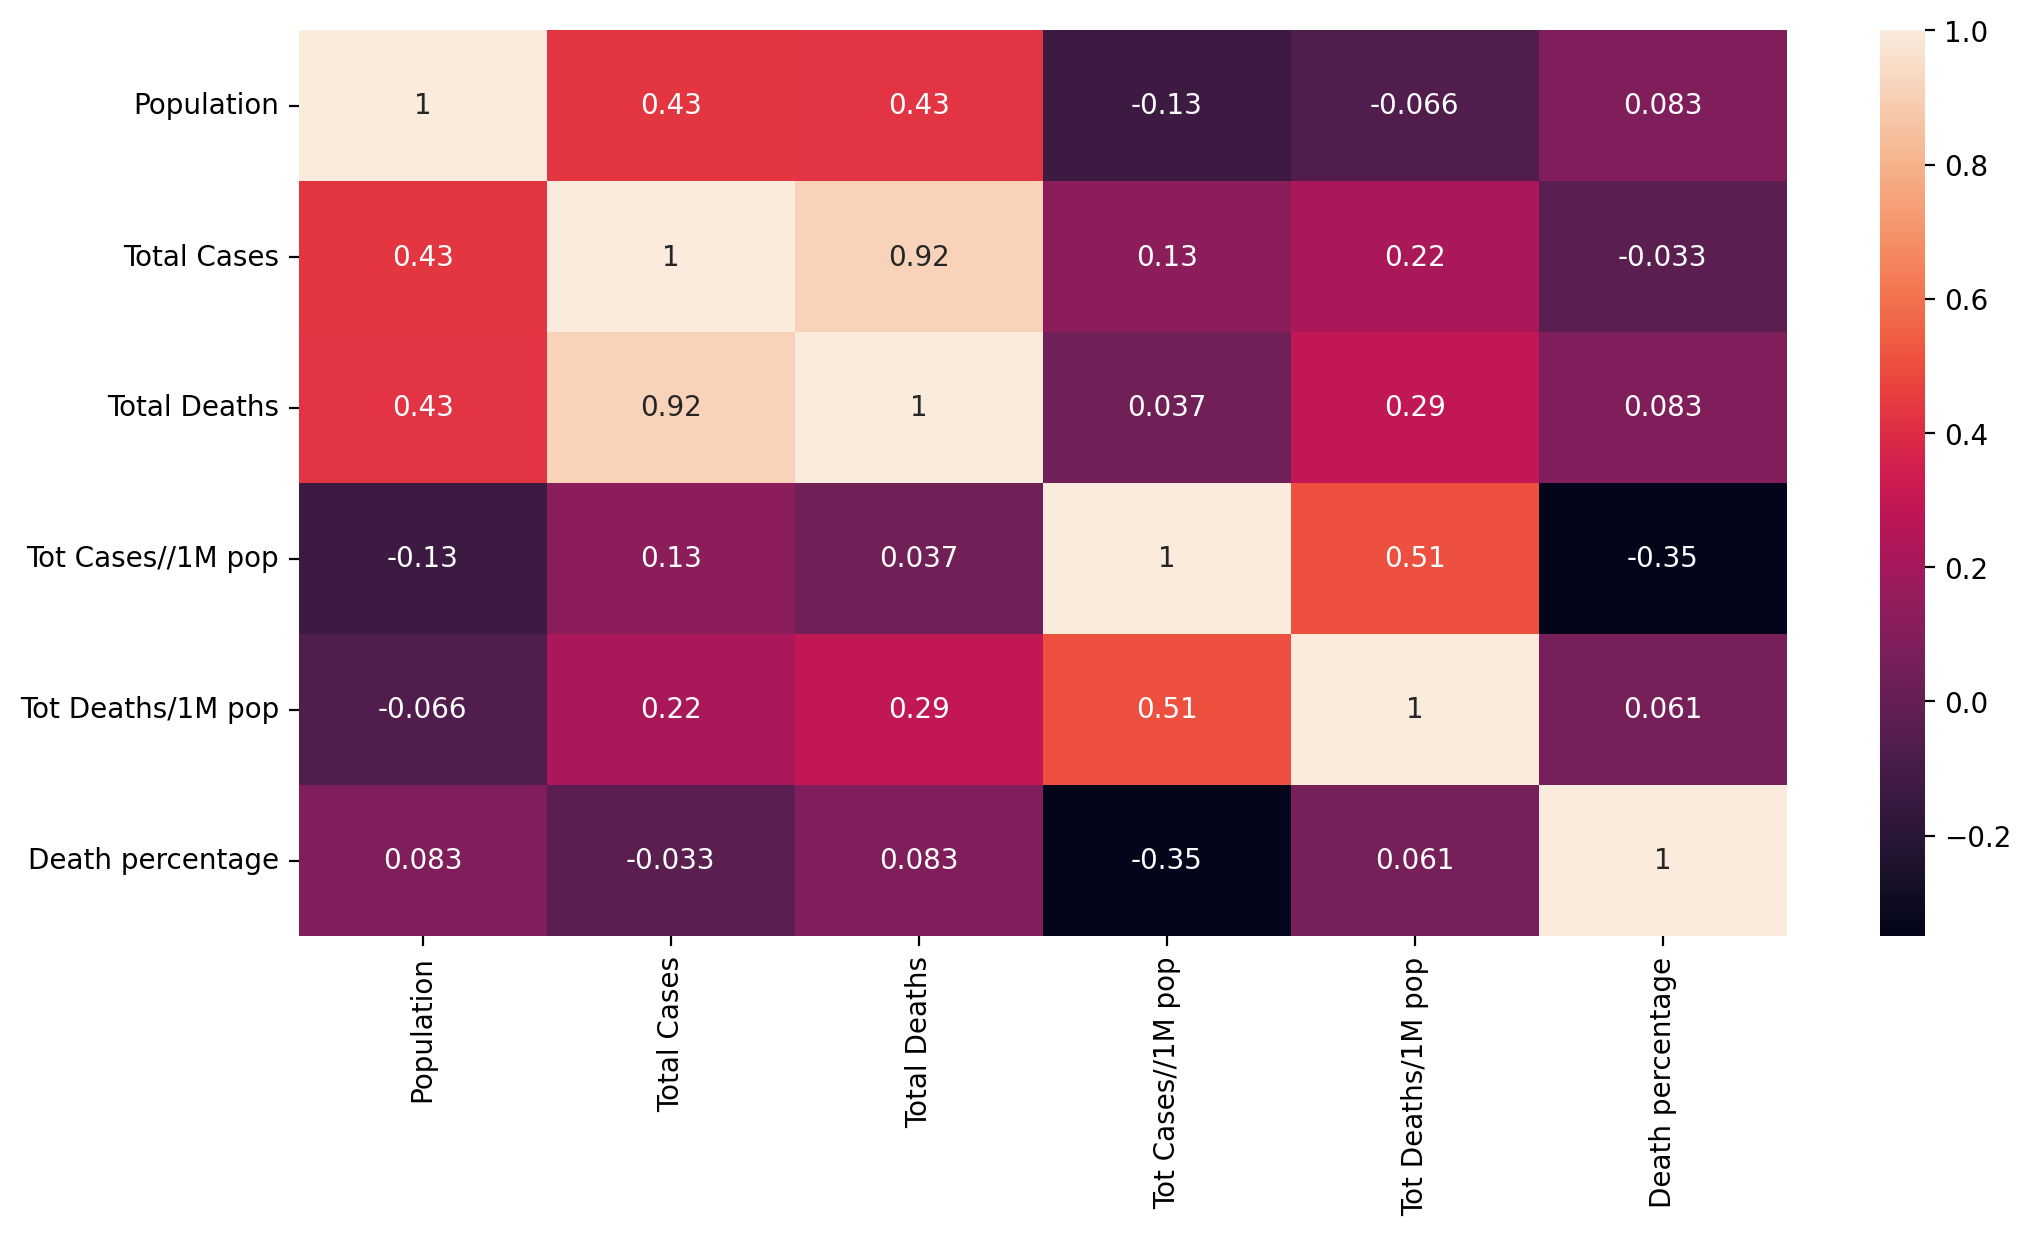

In [127]:
#heatmap
plt.figure(figsize=(12,6),dpi=200)
sns.heatmap(data.corr(),annot=True)